# Netflix Movies and TV Shows

## EDA & Visualization Task

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import missingno as msno
import seaborn as sns
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = os.getenv('HOME')+'/datathon/data/netflix_titles.csv'

data = pd.read_csv(file_path)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


- show_id: unique id of each show

- type: The category of a show, can be either a Movie or a TV Show

- title: Name of the show

- director: Name of the directors of the show

- cast: Name of actors and other cast of the show

- country: Name of countries the show is available to watch on Netflix

- date_added: Date when the show was added on Netflix

- release_year: Release year of the show

- rating: Show rating on netflix

- duration: Time duration of the show

- listed_in: Genre of the show

- description: Some text describing the show

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- 결측치 확인 후, 컬럼 제거
- 각 컬럼 확인 (nunique, 시각화)
- 결측치 보간 (country, date_added, rating, duration)
- 피처 엔지니어링
    - date_added 를 split (year, month)
    - duration (min-movie, season-tvshow)
    - listed_in 를 split (wordcloud, countplot)

### 결측치

<AxesSubplot:>

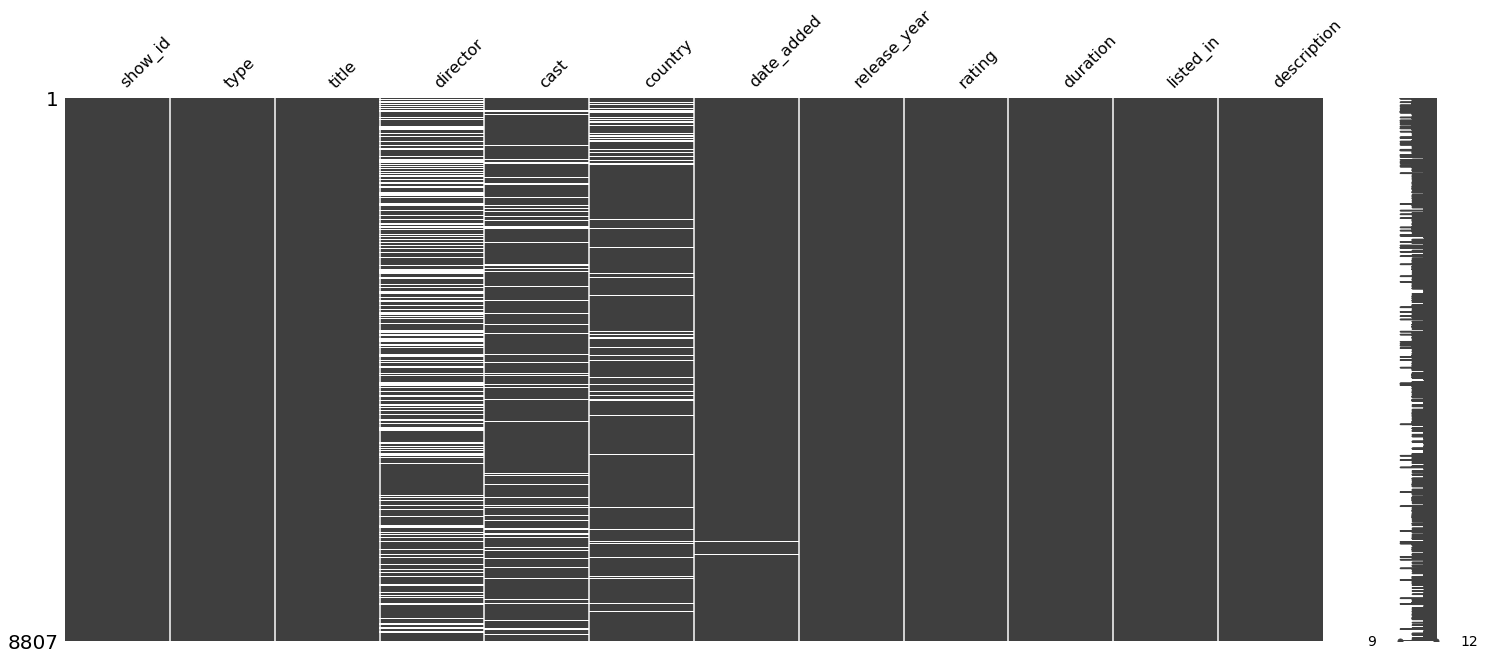

In [4]:
msno.matrix(data)

<AxesSubplot:>

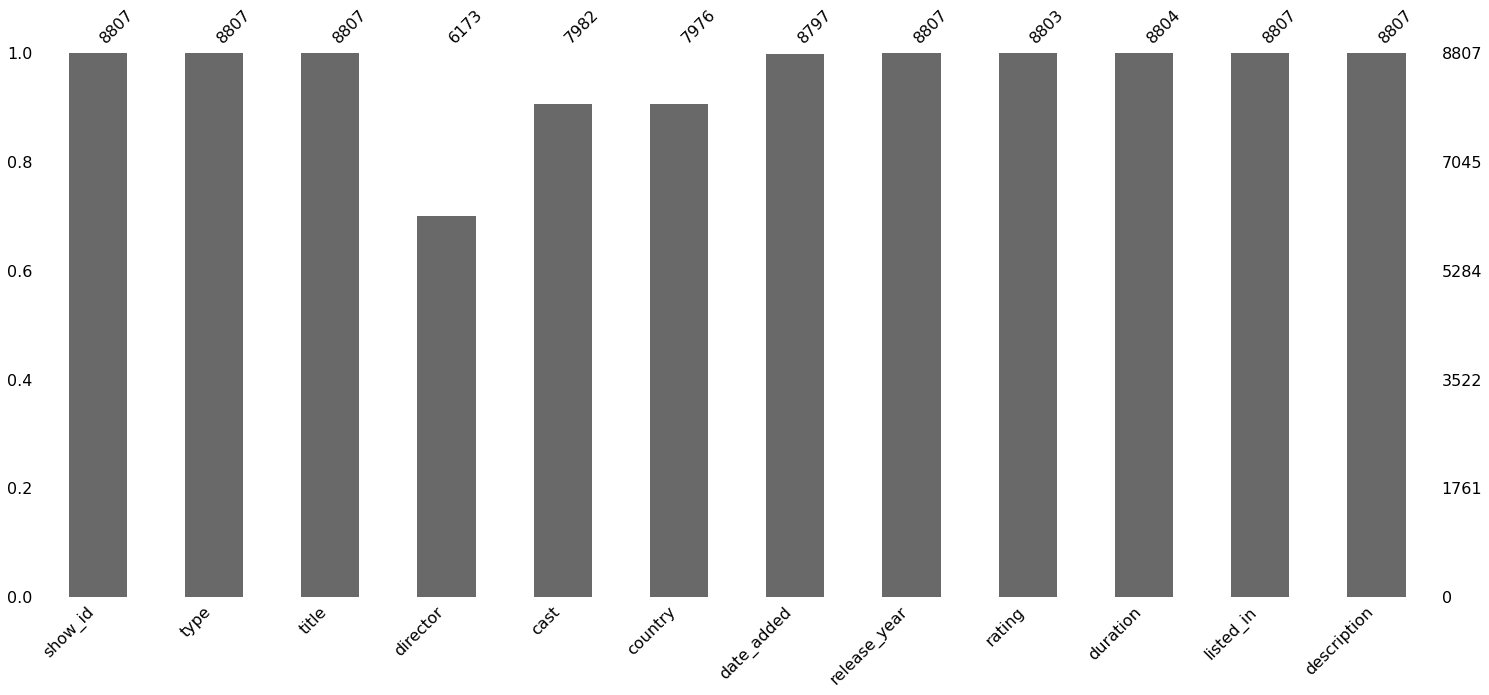

In [5]:
msno.bar(data)

In [6]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- director, cast 컬럼은 결측치가 많으므로 제거
<br>
<br>
- show_id 컬럼은 단순 인덱스이므로 제거

In [7]:
data.drop(['show_id', 'director', 'cast'], axis=1, inplace=True)

data

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


- show_id, director, cast 컬럼 제거

### Type

In [8]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

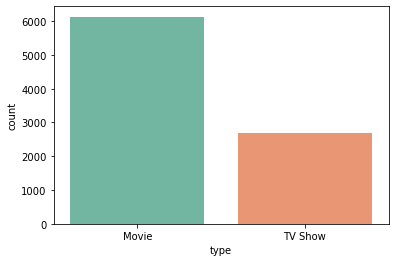

In [9]:
sns.countplot(x='type', data=data, palette='Set2')

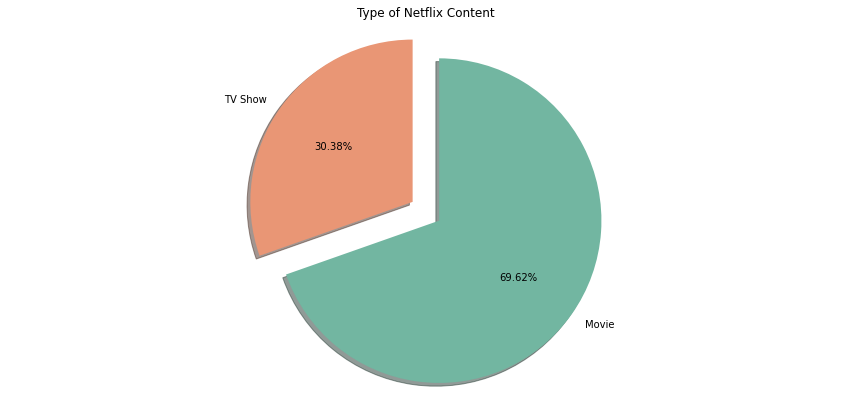

In [10]:
plt.figure(figsize=(15, 7))

labels = ['TV Show', 'Movie']

plt.pie(data['type'].value_counts().sort_values(),
        labels=labels,
        explode=[0.1,0.1],
        autopct='%1.2f%%',
        colors=['#e99675', '#72b6a1'],
        startangle=90,
        shadow=True)

plt.title('Type of Netflix Content')

plt.axis('equal')

plt.show()

- TV Show 에 비해 Movie Type 의 데이터 수가 약 2 배 이상 많습니다.

### Country

In [11]:
data['country'].isna().sum()

831

- 결측치가 831 개

In [12]:
data = data[data["country"].notna()]

data['country'].isna().sum()

0

- 결측치가 모두 제거되어 0

In [13]:
country_count=data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
country_count

,country
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Ireland, United Kingdom, Greece, France, Netherlands",1
"France, Canada, Italy, United States, China",1
"United States, Venezuela",1
"United Kingdom, Canada, Japan",1


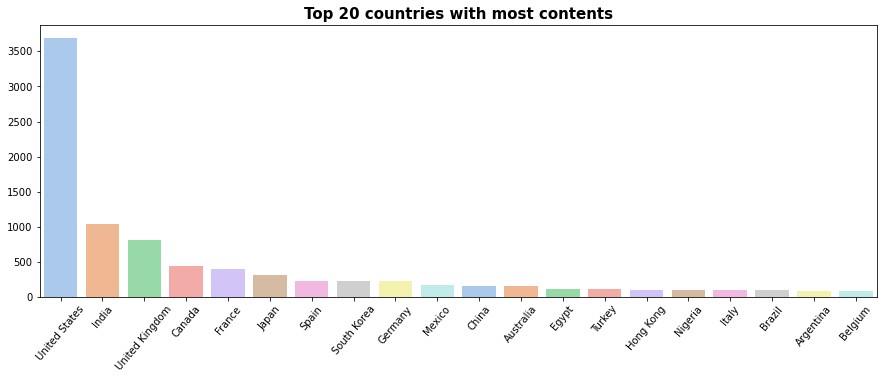

In [14]:
country_data = data['country']

country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace( ', ',',').split(',')))).sort_values(ascending=False)

top20country = country_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x=top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [25]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

# geoplot
country_with_code, country = {}, {}
for c, v in dict(country_count).items():
    code = ""
    if c.lower() in country_codes:
        code = country_codes[c.lower()]
    country_with_code[code] = v
    country[c] = v

geo_data = [dict(type = 'choropleth',
             locations = list(country_with_code.keys()),
             z = list(country_with_code.values()),
             colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                           [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True,
             marker = dict(line = dict(color = 'gray', width = 0.5)),
             colorbar = dict(autotick = False, title = ''),
       )]

layout = dict(
            title = '',
            geo = dict(
                showframe = False,
                showcoastlines = False,
                projection = dict(
                type = 'Mercator'
                )
            )
        )

fig = dict(data=geo_data, layout=layout)
iplot(fig, validate=False, filename='d3-world-map')
plt.show()

- choropleth 와 iplot 을 라이브러리를 활용하여 geograph 를 그릴 수 있다.
<br>
<br>
- choropleth 에 대한 자세한 내용은 다음 링크를 참고
<br>
<br>
- [choropleth-maps spec](https://plotly.com/python/choropleth-maps/)